## (크롤링포함)TelegramBot_RealMomentum_PortFolioScore_ 주식vs채권vs현금 분산투자전략

### 크롤링하여 Data 수집하여 excel파일에 저장하여 처리함

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

# Finance Library import
import os
import sys
sys.path.append("C:\\DualMomentum\\BackTesting")
from Library import FinanceLibrary as fl
sys.path.append("C:\DualMomentum\Crawling")
import ETFCrawling as crawling

### 크롤링하기

In [2]:
# kodex200, 국고채10년, 국고채3변 크롤링 하기
crawling.kodex200()
crawling.bond10()
crawling.bond3()

##### File 읽어오기

In [3]:
df_kodex = pd.read_csv("..\\Data\\KODEX200_data.csv", encoding="utf-8")
df_bond10 = pd.read_csv("..\\Data\\KOSEF국고채10년_data.csv", encoding="utf-8")
df_bond3 = pd.read_csv("..\\Data\\KOSEF국고채3년_data.csv", encoding="utf-8")

##### KODEX 주간, 월간데이터 만들기

In [4]:
df_kodex["Date"] = pd.to_datetime(df_kodex["Date"])  # Converting date to pandas datetime format
df_kodex["Year"] = df_kodex["Date"].dt.year  # Getting year number
df_kodex["Month"] = df_kodex["Date"].dt.month  # Getting month number
df_kodex["Week_Number"] = df_kodex["Date"].dt.week  # Getting week number
df_kodex["WeekDay"] = df_kodex["Date"].dt.weekday  # Getting weekday number
# 주간, 월간 Data만들기
df_kodex_week = df_kodex.groupby(["Year","Week_Number"]).agg({"Open":"first","High":"max","Low":"min","Close":"last","Volume":"sum","Date":"last"})
df_kodex_month = df_kodex.groupby(["Year","Month"]).agg({"Open":"first","High":"max","Low":"min","Close":"last","Volume":"sum","Date":"last"})

##### 국채10년 주간,월간데이터 만들기

In [5]:
df_bond10["Date"] = pd.to_datetime(df_bond10["Date"])  # Converting date to pandas datetime format
df_bond10["Year"] = df_bond10["Date"].dt.year  # Getting year number
df_bond10["Month"] = df_bond10["Date"].dt.month  # Getting month number
df_bond10["Week_Number"] = df_bond10["Date"].dt.week  # Getting week number
df_bond10["WeekDay"] = df_bond10["Date"].dt.weekday
# 주간, 월간 Data만들기
df_bond10_week = df_bond10.groupby(["Year","Week_Number"]).agg({"Open":"first","High":"max","Low":"min","Close":"last","Volume":"sum","Date":"last"})
df_bond10_month = df_bond10.groupby(["Year","Month"]).agg({"Open":"first","High":"max","Low":"min","Close":"last","Volume":"sum","Date":"last"})

##### 국채3년 주간,월간데이터 만들기

In [6]:
df_bond3["Date"] = pd.to_datetime(df_bond3["Date"])  # Converting date to pandas datetime format
df_bond3["Year"] = df_bond3["Date"].dt.year  # Getting year number
df_bond3["Month"] = df_bond3["Date"].dt.month  # Getting month number
df_bond3["Week_Number"] = df_bond3["Date"].dt.week  # Getting week number
df_bond3["WeekDay"] = df_bond3["Date"].dt.weekday
# 주간, 월간 Data만들기
df_bond3_week = df_bond3.groupby(["Year","Week_Number"]).agg({"Open":"first","High":"max","Low":"min","Close":"last","Volume":"sum","Date":"last"})
df_bond3_month = df_bond3.groupby(["Year","Month"]).agg({"Open":"first","High":"max","Low":"min","Close":"last","Volume":"sum","Date":"last"})

##### 국고채10년 데이터 시작주인 2011,42주후 데이터 만들기

In [7]:
# 국고채10년 데이터 시작주인 2011,42주후 데이터 만들기
kodex_month = df_kodex_month.loc[(2011,42):]
bond10_month = df_bond10_month.loc[(2011,42):]
bond3_month = df_bond3_month.loc[(2011,42):]
# "Date"컬럼을 index으로 지정하기
kodex_month = kodex_month.reset_index()
kodex_month.index = pd.to_datetime(kodex_month["Date"])
kodex_month = kodex_month.sort_index()
#
bond10_month = bond10_month.reset_index()
bond10_month.index = pd.to_datetime(bond10_month["Date"])
bond10_month = bond10_month.sort_index()
#
bond3_month = bond3_month.reset_index()
bond3_month.index = pd.to_datetime(bond3_month["Date"])
bond3_month = bond3_month.sort_index()

##### re-scale

In [8]:
KODEX = kodex_month["Close"]/kodex_month["Close"][0]
KODEX = pd.DataFrame(KODEX)
BOND10 = bond10_month["Close"]/bond10_month["Close"][0]
BOND10 = pd.DataFrame(BOND10)
BOND3 = bond3_month["Close"]/bond3_month["Close"][0]
BOND3 = pd.DataFrame(BOND3)

#### 주식, 국채10년, 국채3년 수익률

In [9]:
KODEX["Retrun"] = fl.YesterdayReturn(KODEX)
KODEX["Retrun"][0] = 1  # 첫번째 NaN은 "1"로 채워준다
BOND10["Retrun"] = fl.YesterdayReturn(BOND10)
BOND10["Retrun"][0] = 1  # 첫번째 NaN은 "1"로 채워준다
BOND3["Retrun"] = fl.YesterdayReturn(BOND3)
BOND3["Retrun"][0] = 1  # 첫번째 NaN은 "1"로 채워준다

##### 평균모멘텀 스코어 구하기

# Momentum? 6months

In [10]:
# KODEX 평균모멘텀 스코어, 기간설정
KODEX["Avg Mo-Score"] = fl.AverageMomentumScore(KODEX["Close"],6)
BOND10["Avg Mo-Score"] = fl.AverageMomentumScore(BOND10["Close"],6)

### Real Momentum 사용하기

##### 현금비중 조정

In [11]:
Cash_Score = 0.5  # 현금비율, 1(안정), 0.5(중간), 0.25(위험)

In [12]:
KODEX["Real Mo-Score"] = fl.RealMomentumScore(KODEX["Close"],BOND3["Close"],6)
BOND10["Real Mo-Score"] = fl.RealMomentumScore(BOND10["Close"],BOND3["Close"],6)

# 투자 비중 = KODEX평균모멘텀 스코어 / ( KODEX 12개월 평균 모멘텀 + BOND10 12개월 평균 모멘텀 + 현금비율)
KODEX["Ratio"] = KODEX["Real Mo-Score"]/ (KODEX["Real Mo-Score"] + BOND10["Real Mo-Score"]  + Cash_Score)
BOND10["Ratio"] = BOND10["Real Mo-Score"]/ (KODEX["Real Mo-Score"] + BOND10["Real Mo-Score"] + Cash_Score)
# 최종적으로 "1 - 사전비율"은 현금성 자산인 BOND3의 비율이 된다.
BOND3["Ratio"] = 1 - (BOND10["Ratio"] + KODEX["Ratio"])

# PortFolio Score 비율투자

In [13]:
PortFolio = pd.DataFrame()
PortFolio["PreScore"] = KODEX["Ratio"] + BOND10["Ratio"]

### Pre 투자수익

In [14]:
# 모멘텀비중 투자, 수익률 YesterdayReturn임으로 투자비율은 어제것을 가지고 와서 계산한다.
PortFolio["Pre수익"] = (KODEX["Retrun"] * KODEX["Ratio"].shift(1)) + (BOND10["Retrun"] * BOND10["Ratio"].shift(1))\
            + (BOND3["Retrun"] * BOND3["Ratio"].shift(1))
PortFolio["Pre수익"][0] = 1  # 첫 NaN값을 "1"로 채워준다
PortFolio["Pre누적수익"] = np.cumprod(PortFolio["Pre수익"])  # 누적 수익률 = 마켓스코어만큼 투자하고 나머지 현금으로 보유
PortFolio["Pre누적수익"][0] = 1  # 첫 NaN값을 "1"로 채워준다
# 동일비중 투자
PortFolio["균등수익"] = KODEX["Retrun"] * 1/3 + BOND10["Retrun"] * 1/3 + BOND3["Retrun"] * 1/3
PortFolio["균등누적수익"] = np.cumprod(PortFolio["균등수익"]) # 누적 수익률 = 마켓스코어만큼 투자하고 나머지 현금으로 보유

# 수익곡선 포트폴리오, 기간 6개월

In [15]:
# 모멘텀 투자
PortFolio["PortRatio"] = fl.AverageMomentumScore(PortFolio["Pre누적수익"],6)
PortFolio["CashRatio"] = 1 - PortFolio["PortRatio"]
# 포트폴리오 수익률 그래프 스코어 계산후 적용은 어제것을 사용한다. Return만 현재이고 Ratio도 어제것을 사용한다.
PortFolio["PortReturn"] = PortFolio["PortRatio"].shift(1) * (KODEX["Retrun"] * KODEX["Ratio"].shift(1) + (BOND10["Retrun"]* BOND10["Ratio"].shift(1))\
            + (BOND3["Retrun"] * BOND3["Ratio"].shift(1)))
PortFolio["PortCashReturn"] = PortFolio["CashRatio"].shift(1) * BOND3["Retrun"]
PortFolio["Port최종수익"] = PortFolio["PortReturn"] + PortFolio["PortCashReturn"]
PortFolio["Port최종누적수익"] = np.cumprod(PortFolio["Port최종수익"])  # 누적 수익률 = 마켓스코어만큼 투자하고 나머지 현금으로 보유
PortFolio["Port최종누적수익"][0] = 1  # 첫 NaN값을 "1"로 채워준다

In [16]:
# csv로 저장
#PortFolio.to_csv("PortFolio.csv",sep=",",encoding="euc-kr")

##### 포트폴리오 성과 비교하기

In [17]:
kodex = fl.Portfolio(KODEX["Close"],"KODEX")
bond10 = fl.Portfolio(BOND10["Close"],"BOND10")
cash = fl.Portfolio(BOND3["Close"],"CASH")
pre = fl.Portfolio(PortFolio["Pre누적수익"],"Pre누적수익")
port = fl.Portfolio(PortFolio["Port최종누적수익"],"Port최종누적수익")
균등 = fl.Portfolio(PortFolio["균등누적수익"],"균등누적수익")

result = pd.concat([kodex,bond10,cash,pre,port,균등],axis=1)
pd.DataFrame(result).T

,Initial Balnce,Final Balance,CAGR,Std,Max.Drawdown,Sharpe Ratio
KODEX,1.0,1.194394,2.2453,0.129128,-20.1537,0.077997
BOND10,1.0,1.382761,4.1342,0.112406,-8.3105,0.328742
CASH,1.0,1.228832,2.6093,0.065270,-1.2762,0.654909
Pre누적수익,1.0,1.379981,4.1080,0.134253,-5.1241,0.289282
Port최종누적수익,1.0,1.336834,3.6954,0.118495,-3.8991,0.317418
균등누적수익,1.0,1.282184,3.1558,0.092077,-4.1461,0.250938


# 청산전략

In [18]:
df_exit = fl.ChandelierYoYo(df_kodex,3,2)
df_exit.index = pd.to_datetime(df_exit["Date"])
# 청산전략 그래프 기간 설정
df_exit = df_exit["2019":]
DD, MDD = fl.MDD(df_exit["Close"])

##### 청산전략 그래프

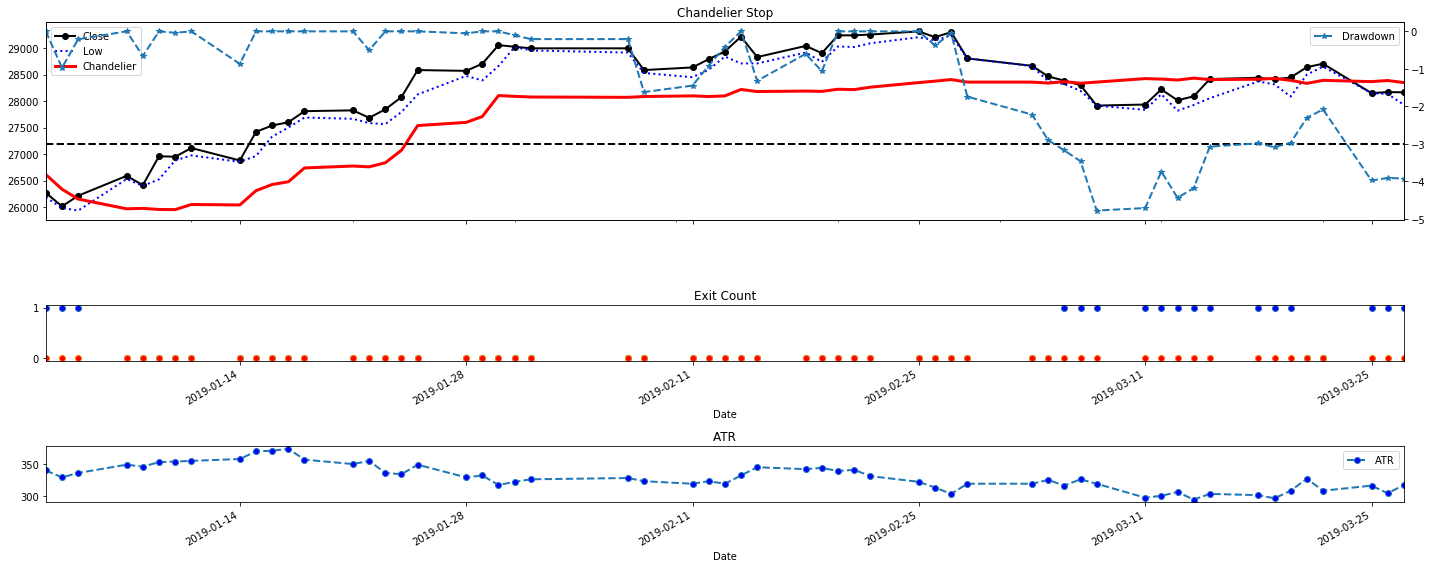

In [19]:
%matplotlib inline
import matplotlib.pylab as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams['lines.linewidth'] = 2
#plt.rcParams['lines.color'] = 'Black'
plt.rcParams['axes.grid'] = False 

fig = plt.figure()
ax1 = plt.subplot2grid((4,1),(0,0),rowspan=2)
ax1.set_title("Chandelier Stop")
df_exit["Close"].plot(color="Black",label="Close",marker="o")
df_exit["Low"].plot(linestyle=":",color="Blue", label="Low")
df_exit["Chandelier"].plot(color="Red", label="Chandelier", linewidth="3")
plt.legend()

tw_ax1 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
DD.plot(linestyle="--", marker="*")
tw_ax1.hlines(linestyle="--",y=-3,xmin=DD.index[0],xmax=DD.index[-1])
plt.legend()

ax2 = plt.subplot2grid((4,1),(2,0))
ax2.set_title("Exit Count")
df_exit["ChandelierExit"].plot(marker='o',markerfacecolor='blue',linestyle="",label="Chandelier Exit")
df_exit["YoYoExit"].plot(marker='o',markerfacecolor='Red',linestyle="",label="YoYo Exit")

ax3 = plt.subplot2grid((4,1),(3,0))
ax3.set_title("ATR")
df_exit["ATR"].plot(marker='o',markerfacecolor='blue',linestyle="--",label="ATR")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend()
plt.savefig("../Img/Exit.jpg")
plt.show()

##### 전략성과 그래프

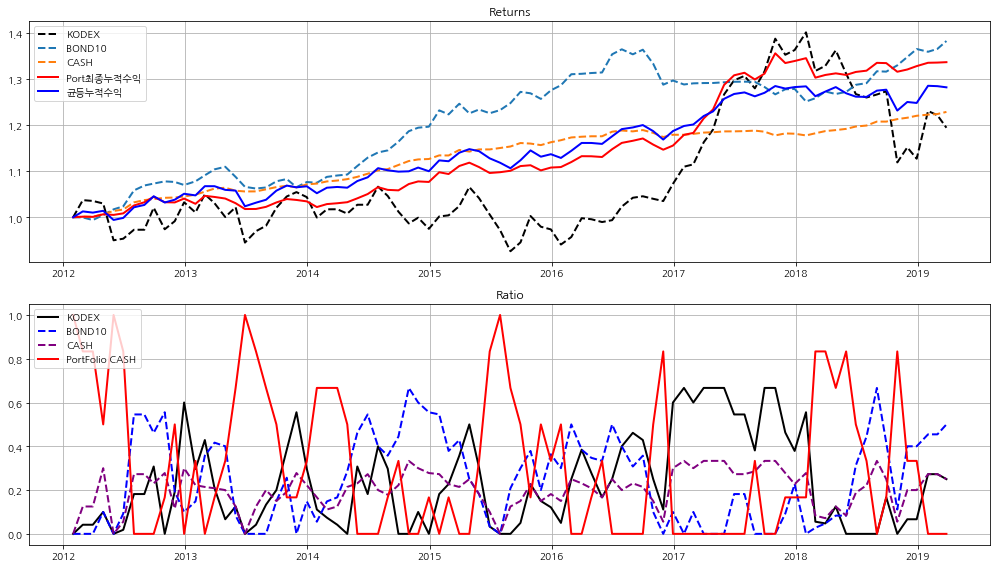

In [20]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#한글폰트사용하기
from matplotlib import rc, font_manager
import matplotlib
rc("font", family="NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.set_title("Returns")
ax1.plot(KODEX["Close"],color="Black",linestyle="--",label="KODEX")
ax1.plot(BOND10["Close"],linestyle="--",label="BOND10")
ax1.plot(BOND3["Close"],linestyle="--",label="CASH")
ax1.plot(PortFolio["Port최종누적수익"],color="Red",label="Port최종누적수익")
ax1.plot(PortFolio["균등누적수익"],color="Blue",label="균등누적수익")
ax1.grid()
ax1.legend(loc=2)

ax2.set_title("Ratio")
ax2.plot(PortFolio["PortRatio"]*KODEX["Ratio"],color="Black", label="KODEX")
ax2.plot(PortFolio["PortRatio"]*BOND10["Ratio"], color="Blue", linestyle="--",label="BOND10")
ax2.plot(PortFolio["PortRatio"]*BOND3["Ratio"], color="Purple", linestyle="--",label="CASH")
ax2.plot(PortFolio["CashRatio"], color="Red",label="PortFolio CASH")
ax2.grid()
ax2.legend(loc=2)

# 차트끼리 충돌을 방지합니다.
plt.tight_layout()
plt.savefig("../Img/PortFolio.jpg")
plt.show()

# TelegramBot 보내기

In [21]:
import sys
# ChatBot Library import
import os
import sys
sys.path.append("C:\\DualMomentum\\Telegram")
import ChatBotModel

In [22]:
# 봇 기능 만들기
def proc_PORT(bot, update):
    DUAL.sendMessage(text="PortFolio")

# 텔레그램 봇 생성하기
DUAL = ChatBotModel.BotDual()

##### 자산별 배분 구하기

In [23]:
# 자본금 설정, 매달 한번 트레이딩 할때 사용할 변수 Capital
Capital = 1000000 #단위:원
# 매월 4주 트레이딩 할때 사용할 변수 Quarter
Quarter = Capital / 4
# 종목별 가격
kodex_close = kodex_month["Close"]
bond10_close = bond10_month["Close"]
bond3_close = bond3_month["Close"]

In [24]:
CapitalRatio = pd.DataFrame()
CapitalRatio["Cash Ratio"] = np.round(PortFolio["CashRatio"],2)
CapitalRatio["KODEX Ratio"] = np.round(PortFolio["PortRatio"] * KODEX["Ratio"],2)
CapitalRatio["BOND10 Ratio"] = np.round(PortFolio["PortRatio"] * BOND10["Ratio"],2)
CapitalRatio["BOND3 Ratio"] = np.round(PortFolio["PortRatio"] * BOND3["Ratio"],2)

In [25]:
# 자산 비율 * 자산 금액 / 종목가격 = 구매수량
CapitalRatio["kodex count"] = CapitalRatio["KODEX Ratio"].apply(lambda x: x * Capital) / kodex_close
CapitalRatio["bond10 count"] = CapitalRatio["BOND10 Ratio"].apply(lambda x: x * Capital) / bond10_close
CapitalRatio["bond3 count"] = CapitalRatio["BOND3 Ratio"].apply(lambda x: x * Capital) / bond3_close
CapitalRatio["cash count"] = CapitalRatio["Cash Ratio"].apply(lambda x: x * Capital) / bond3_close
# 구매수량 int
CapitalRatio["kodex count"] = CapitalRatio["kodex count"].apply(lambda x: int(x))
CapitalRatio["bond10 count"] = CapitalRatio["bond10 count"].apply(lambda x: int(x))
CapitalRatio["bond3 count"] = CapitalRatio["bond3 count"].apply(lambda x: int(x))
CapitalRatio["cash count"] = CapitalRatio["cash count"].apply(lambda x: int(x))

In [26]:
count_yesterday = CapitalRatio.iloc[-2].values
count_today = CapitalRatio.iloc[-1].values

In [27]:
# CapitalRatio 구조 : Cash Ratio	KODEX Ratio	BOND10 Ratio	BOND3 Ratio	kodex count	bond10 count	bond3 count	cash count

In [28]:
re_ratio = "투자비율은 Cash : {}, KODEX : {}, BOND10 : {}, BOND3 : {}".format(\
            count_today[0], count_today[1], count_today[2], count_today[3])

In [29]:
re_balance = "구매수량은 KODEX : {}({}), BOND10 : {} ({}), BOND3 : {} ({}), Cash : {} ({})".format(\
            count_today[4], count_today[4] - count_yesterday[4],\
            count_today[5], count_today[5] - count_yesterday[5],\
            count_today[6], count_today[6] - count_yesterday[6],\
            count_today[7], count_today[7] - count_yesterday[7])

### 메세지 보내기

In [30]:
DUAL.sendMessage(re_balance)
DUAL.sendMessage(re_ratio)
DUAL.sendPhoto(open("../Img/PortFolio.jpg", "rb"))
DUAL.sendPhoto(open("../Img/Exit.jpg", "rb"))